In [ ]:
"""
joinplot()/pairplot()
"""

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

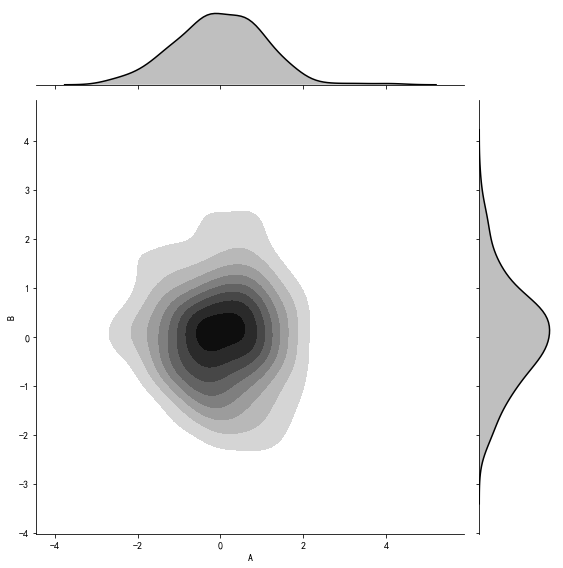

In [6]:
# 综合散点图   joinplot()
# 散点图+分布图

rs = np.random.RandomState(2)
df = pd.DataFrame(rs.randn(200,2),columns=['A','B'])


sns.jointplot(x=df['A'],y=df['B'],# 设置xy轴，显示columns名称
              data=df,
              color='k',
#             s=50,edgecolor='w',linewidth=1,# 设置散点大小，边缘线颜色及宽度，只针对scatter
              kind='kde',#  设置类型   resid,kde, hex  scatter
              space=0.2,#散点图与布局图的间距
              size =8, #图标大小
              ratio=5 ,# 散点图与布局图高度比，整型
#               marginal_kws=dict(bins=15,rug=True)
              shade_lowest=False,
             )


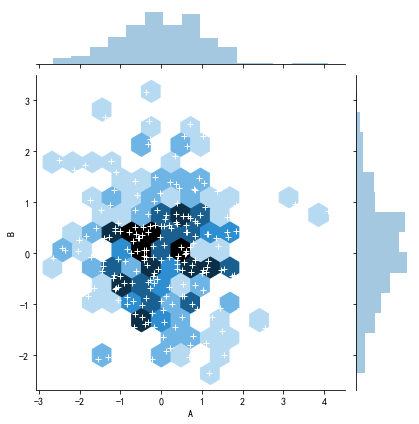

In [7]:
# 蜂窝图
rs = np.random.RandomState(2)
df = pd.DataFrame(rs.randn(200,2),columns=['A','B'])


g = sns.jointplot(x=df['A'],y=df['B'],# 设置xy轴，显示columns名称
              data=df,
              kind='hex',#  设置类型   resid,kde, hex  scatter
             )
g.plot_joint(plt.scatter,c='w',s=30,linewidth=1,marker='+')

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


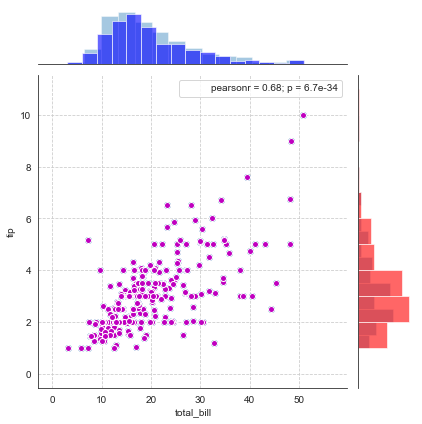

In [25]:
# 可拆分绘制的散点图
# plot_joint() +  ax_marg_x.hist() + ax_marg_y.hist()
tips = sns.load_dataset('tips')
print(tips.head())
sns.set_style('white')
g = sns.jointplot(x='total_bill',y='tip',data=tips)

g.plot_joint(plt.scatter,color='m',edgecolor='white')# 框内图

g.ax_marg_x.hist(tips['total_bill'],color='b',alpha=.6,bins=np.arange(0,60,3))#  bins箱子数
g.ax_marg_y.hist(tips['tip'],color='r',alpha=.6,orientation='horizontal',bins=np.arange(0,12,1))

from scipy import stats
g.annotate(stats.pearsonr)  #  spearmanr\pearsonr   
plt.grid(linestyle='--')

 

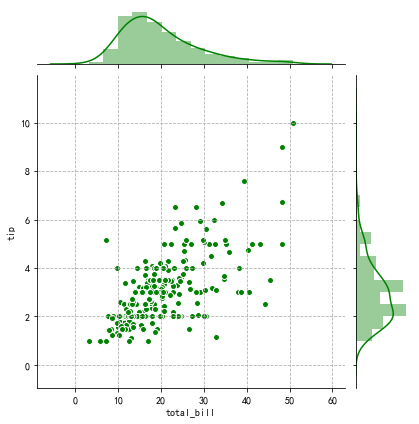

In [18]:
# 可拆分绘制的散点图
# plot_joint() +  plot_marginals()
tips = sns.load_dataset('tips')
g = sns.JointGrid(x='total_bill',y='tip',data=tips)

g.plot_joint(plt.scatter,color='g',edgecolor='white')# 框内图
plt.grid(linestyle='--')
g.plot_marginals(sns.distplot,kde=True,color='g')

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


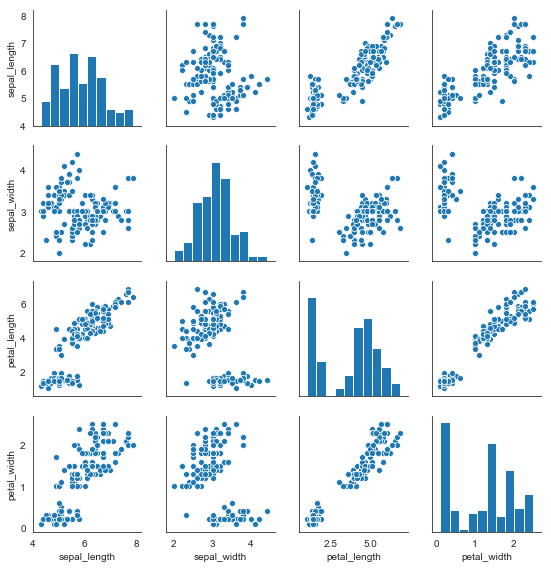

In [28]:
# 矩阵散点图
iris = sns.load_dataset('iris')
print(iris.head())


sns.pairplot(iris,
            kind='scatter',    # 散点图 、回归分布图   scatter  reg
            diag_kind='hist',# 直方图  密度图    hist  kde
#              hue='species',# 按照某一字段进行分类
             palette='husl',# 调色板
#              markers=['o','s','D'],# 设置不同系列的点样式
             size=2 , # 图表大小
            )

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


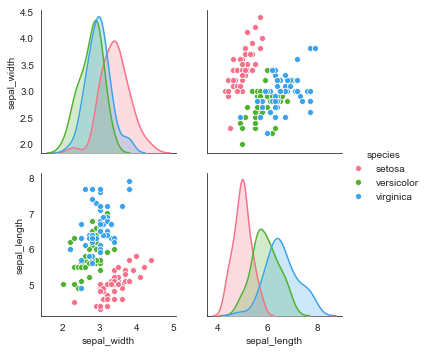

In [29]:
# 矩阵散点图
iris = sns.load_dataset('iris')
print(iris.head())


sns.pairplot(iris,vars=['sepal_width','sepal_length'],# 只提取局部变量
            kind='scatter',    # 散点图 、回归分布图   scatter  reg
            diag_kind='kde',# 直方图  密度图    hist  kde
             hue='species',# 按照某一字段进行分类
             palette='husl',# 调色板
            )

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


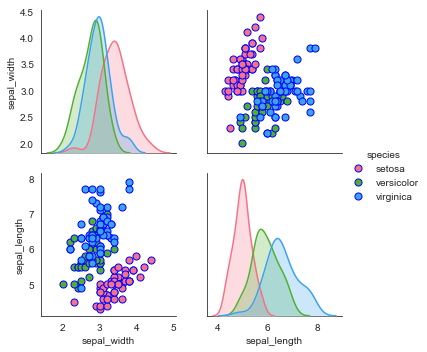

In [30]:
iris = sns.load_dataset('iris')
print(iris.head())


sns.pairplot(iris,vars=['sepal_width','sepal_length'],# 只提取局部变量
             plot_kws=dict(s=50,edgecolor='b',linewidth=1),# 点样式
             diag_kws=dict(shade=True),
             
            kind='scatter',    # 散点图 、回归分布图   scatter  reg
            diag_kind='kde',# 直方图  密度图    hist  kde
             hue='species',# 按照某一字段进行分类
             palette='husl',# 调色板
            )

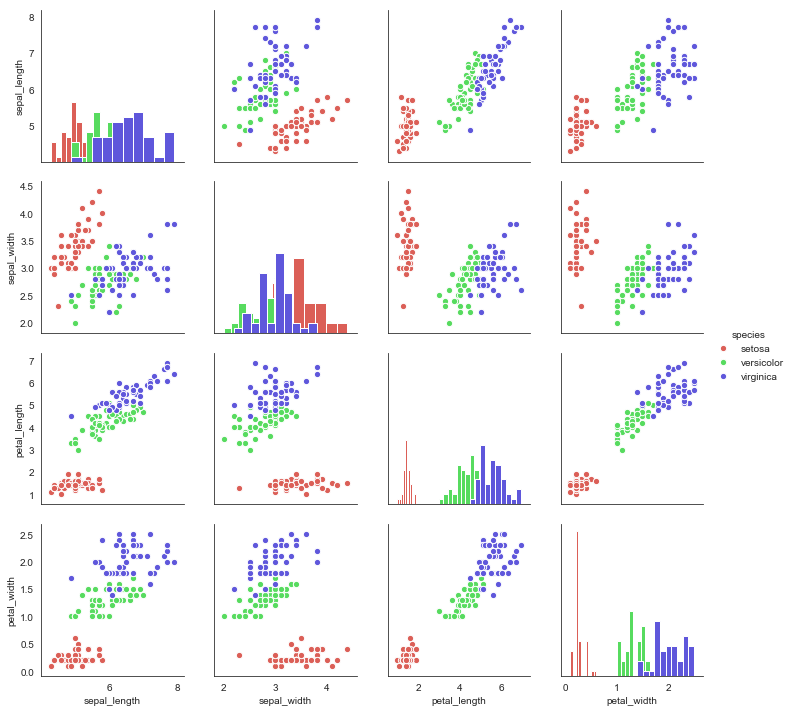

In [33]:
# 可拆分绘制的散点图
# map_diag() +  map_offdiag()
iris = sns.load_dataset('iris')

g = sns.PairGrid(iris,hue='species',palette='hls',
                vars=['sepal_length','sepal_width','petal_length','petal_width']
                )

# 对角线图表
g.map_diag(plt.hist,
          histtype='barstacked', # bar   step  stepfilled  barstacked
           linewidth=1,
           edgecolor='w',
          )# 对角线图表，plt.hist/sns.kdeplot
# 其他图标
g.map_offdiag(plt.scatter,
             edgecolor='w',
             s=40,
             linewidth=1,#  设置点颜色、大小、描边宽度
             )
g.add_legend()

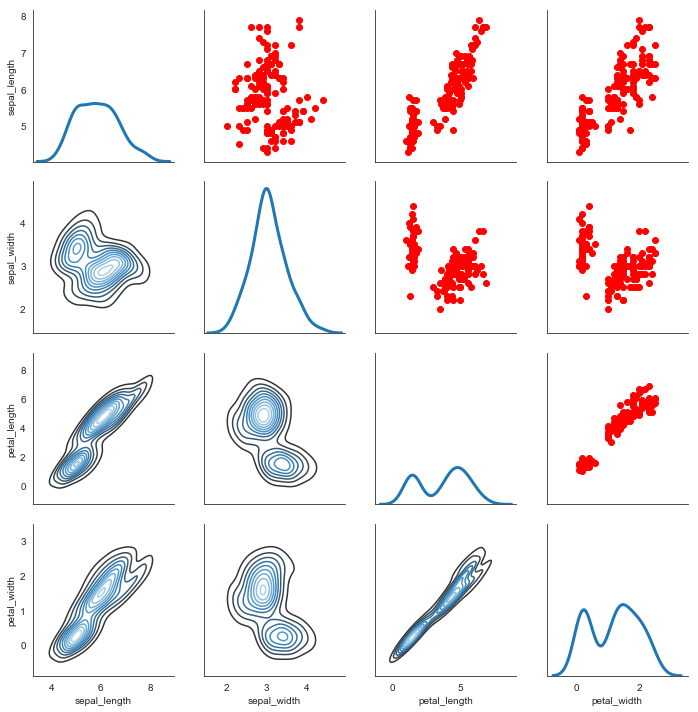

In [35]:
# 可拆分绘制的散点图
# map_diag() +  map_offdiag()
iris = sns.load_dataset('iris')

g = sns.PairGrid(iris)

# 对角线图表
g.map_diag(sns.kdeplot,lw=3          )# 对角线图表，plt.hist/sns.kdeplot
# 对角线上方
g.map_upper(plt.scatter,color='r')
# 对角线下方
g.map_lower(sns.kdeplot,cmap='Blues_d')